### Import libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import time
import statistics
import glob
import math
import os
sns.set(style="whitegrid")

In [2]:
from utilityFuncs import Catch22
from utilityFuncs import Kats
from utilityFuncs import TSFeatures
from utilityFuncs import TSFel
from utilityFuncs import TSFresh

--------------------------------------

### Load time series

Load the generated time series of the folder _TimeSeries_.

In [3]:
timeSeriesLength = [100, 250, 500, 750, 1000]
timeSeries = []
numberOfSeries = 10

for filename in glob.glob('TimeSeries/*.txt'):
    with open(os.path.join(os.getcwd(), filename), 'r') as f:
        
        # saves data in a matrix
        tsAsArray = np.loadtxt(f, dtype='float')
        
        # transform into a dataframe and add to collection
        ts= pd.DataFrame(tsAsArray)
        timeSeries.append(ts)


Since the naming is based on the length of the time series, it first loads the 1000 long ones --> needs to be changed.

In [4]:
[timeSeries.append(timeSeries[i]) for i in range(numberOfSeries)]
[timeSeries.pop(0) for _ in range(numberOfSeries)]

[            0
 0   -0.126840
 1   -0.847561
 2   -0.894438
 3   -0.908808
 4   -0.931235
 ..        ...
 995  0.601419
 996  0.657151
 997  0.675447
 998  0.720659
 999  0.699525
 
 [1000 rows x 1 columns],
             0
 0   -1.169280
 1   -1.183570
 2   -1.205020
 3   -1.226460
 4   -1.237180
 ..        ...
 995 -0.440191
 996 -0.443765
 997 -0.443765
 998 -0.447339
 999 -0.447339
 
 [1000 rows x 1 columns],
                 0
 0   -1.268020e-12
 1   -1.378050e-12
 2   -1.488080e-12
 3   -1.598100e-12
 4   -1.708130e-12
 ..            ...
 995  2.071250e-02
 996  2.058080e-02
 997  2.044130e-02
 998  2.029400e-02
 999  2.013940e-02
 
 [1000 rows x 1 columns],
             0
 0   -0.472894
 1   -0.189716
 2    0.217448
 3    0.482014
 4    1.242730
 ..        ...
 995 -0.353633
 996 -0.679311
 997 -0.305339
 998 -0.080740
 999  0.140574
 
 [1000 rows x 1 columns],
             0
 0    0.532185
 1    0.822043
 2   -1.529380
 3    0.696702
 4   -1.137750
 ..        ...
 995  0.297777


--------------------------------------

### COMPUTATION TIME BY SERIES

Same base function for each feature set:

In [5]:
# stores the number of features calculated by each feature set
nbrFeats = []

def measureTime(featureSet):
    
    medians = []

    for i in range(len(timeSeriesLength)):
    
        # the first 10 time series are of length 10, the next 10 of length 250 and so on
        part = i*numberOfSeries
    
        timeMeasures = []
    
        for j in range(numberOfSeries):
        
            ind = j + part
            ts = timeSeries[ind].values.reshape(len(timeSeries[ind]))
            
            # get the time
            start = time.time()
            f = featureSet(ts)
            end = time.time()
        
            timeMeasures.append(end-start)
        
        medians.append(statistics.median(timeMeasures))
    
    nbrFeats.append(len(f.iloc[0]))
    return medians

Get time measurements for each feature set:

In [6]:
catch22Time    = measureTime(Catch22.calcFeats)
katsTime       = measureTime(Kats.calcFeats)
tsfeaturesTime = measureTime(TSFeatures.calcFeats)
tsfelTime      = measureTime(TSFel.calcFeats)
tsfreshTime    = measureTime(TSFresh.calcFeats)

measurments = [catch22Time,
               katsTime,
               tsfeaturesTime,
               tsfelTime,
               tsfreshTime]

*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***
*** Feature extraction started ***
60



*** Feature extraction finished ***


Feature Extraction: 100%|█████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.10it/s]


### Plotting

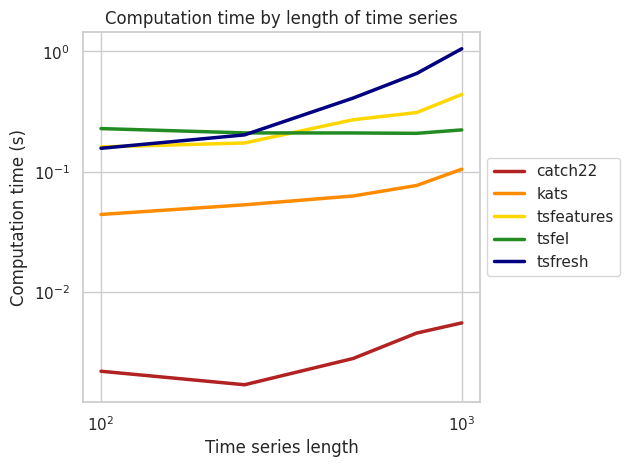

In [10]:
fig, ax = plt.subplots()
lw = 2.5
colorsXsets = [('catch22', 'firebrick'),
               ('kats', 'darkorange'),
               ('tsfeatures', 'gold'),
               ('tsfel', 'forestgreen'),
               ('tsfresh', 'navy')]

for y, i in zip(measurments, colorsXsets):
    ax = sns.lineplot(x = timeSeriesLength, y = y, color=i[1], label=i[0], linewidth=lw)
    
ax.set(xlabel='Time series length', ylabel='Computation time (s)')

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.set_yscale('log')
ax.set_xscale('log')

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Computation time by length of time series')
plt.show()

fig.savefig('outputs/compTime1.pdf')

--------------------------------------

### COMPUTATION TIME PER FEATURE BY SERIES LENGTH

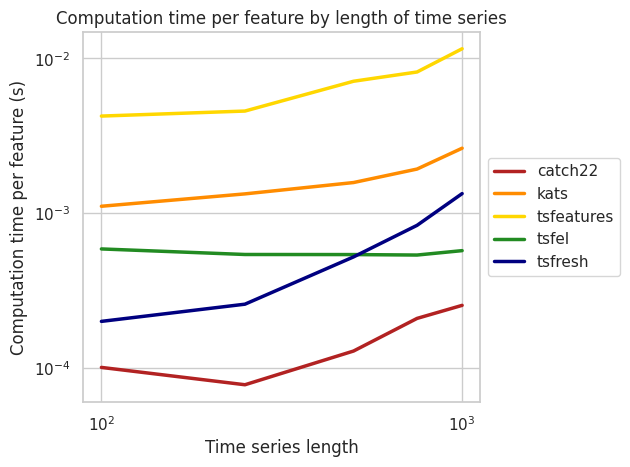

In [11]:
fig, ax = plt.subplots()
lw = 2.5
colorsXsets = [('catch22', 'firebrick'),
               ('kats', 'darkorange'),
               ('tsfeatures', 'gold'),
               ('tsfel', 'forestgreen'),
               ('tsfresh', 'navy')]

for i in range(len(measurments)):
    ax = sns.lineplot(x = timeSeriesLength, y = np.array( measurments[i]) / nbrFeats[i],
                      color=colorsXsets[i][1], label=colorsXsets[i][0], linewidth=lw)
    
ax.set(xlabel='Time series length', ylabel='Computation time per feature (s)')

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.set_yscale('log')
ax.set_xscale('log')

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Computation time per feature by length of time series')
plt.show()

fig.savefig('outputs/compTime2.pdf')